<a href="https://colab.research.google.com/github/Smchavan491/Cognifyz-internship-task/blob/main/Internship_task_level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task : 1

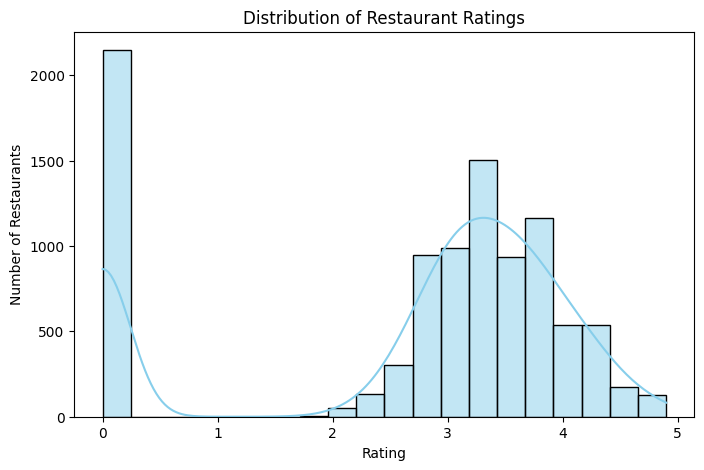

The most common rating range: 0.0 (2148 restaurants)
Average number of votes received by restaurants: 156.91


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Dataset .csv")

# Plot the distribution of aggregate ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], kde=True, bins=20, color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

# Determine the most common rating range
rating_range_counts = df['Aggregate rating'].value_counts().sort_index()
most_common_rating_range = rating_range_counts.idxmax()
most_common_count = rating_range_counts.max()

# Calculate the average number of votes
avg_votes = df['Votes'].mean()

# Display results
print(f"The most common rating range: {most_common_rating_range} ({most_common_count} restaurants)")
print(f"Average number of votes received by restaurants: {avg_votes:.2f}")


#Task : 3

<ipython-input-2-d6b1b5f26f31>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


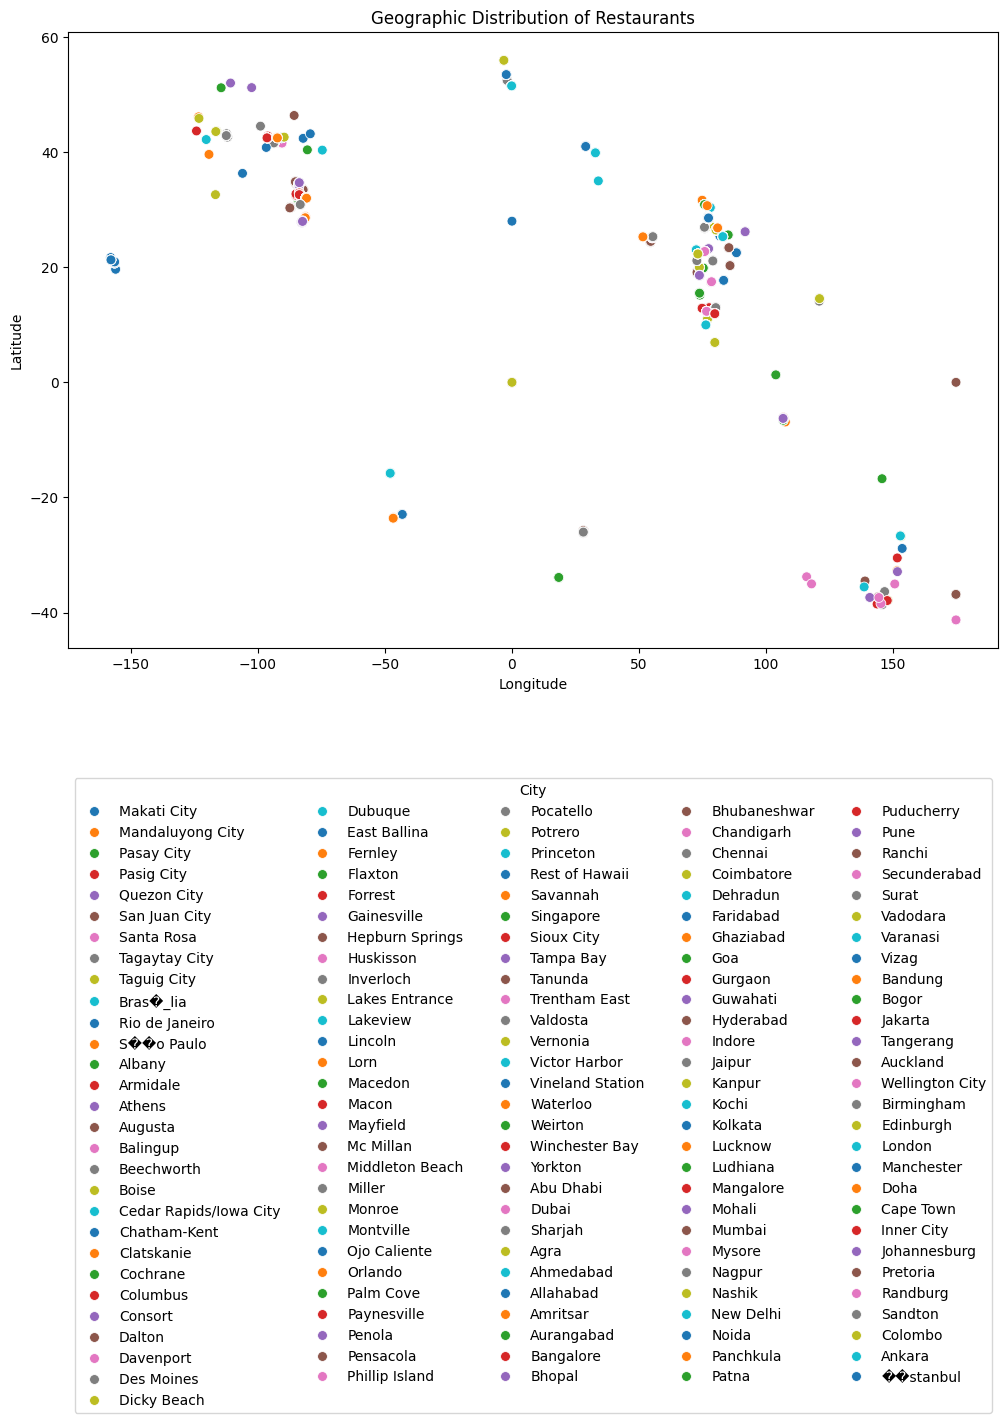

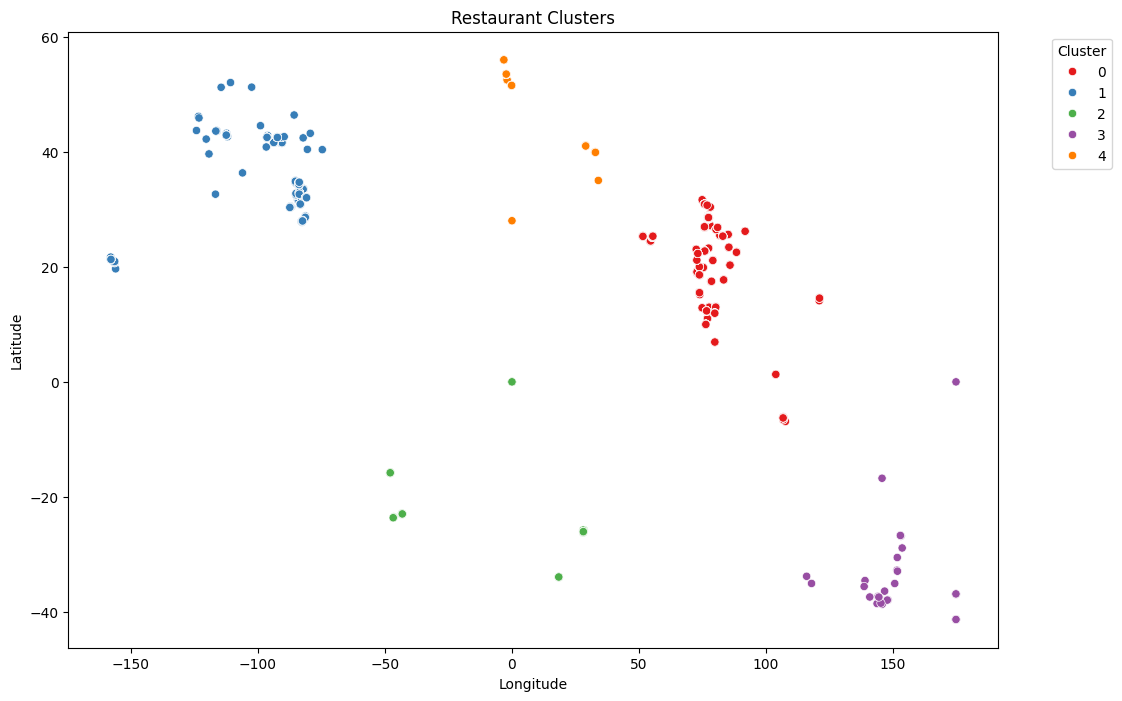

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium


# Load the dataset
data = pd.read_csv('/content/Dataset .csv')


# Task 3: Geographic Analysis
# Filter out restaurants with missing coordinates
data_geo = data.dropna(subset=['Longitude', 'Latitude'])

# Plotting restaurants on a scatter plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=data_geo, hue='City', palette='tab10', s=50)
plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)
plt.tight_layout()
plt.show()

# Clustering restaurants to identify patterns using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data_geo['Cluster'] = kmeans.fit_predict(data_geo[['Longitude', 'Latitude']])

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', palette='Set1', data=data_geo)
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualizing on an interactive map using Folium
m = folium.Map(location=[data_geo['Latitude'].mean(), data_geo['Longitude'].mean()], zoom_start=2)

for _, row in data_geo.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Name: {row['Restaurant Name']}\nCity: {row['City']}\nRating: {row['Aggregate rating']}\nCuisines: {row['Cuisines']}",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(m)

m.save('/content/restaurant_map.html')  # This will generate an interactive map file in Colab


#Task : 4

In [3]:
# Task 4: Restaurant Chains
# Identify restaurant chains by checking for repeated names
restaurant_counts = data['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1].index.tolist()

# Filter data for chains
data_chains = data[data['Restaurant Name'].isin(restaurant_chains)]

# Analyze ratings and popularity of chains
chain_ratings = data_chains.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Number of Outlets'}).sort_values(by='Votes', ascending=False)

print("Top Restaurant Chains by Popularity:")
print(chain_ratings.head())

Top Restaurant Chains by Popularity:
                           Aggregate rating  Votes  Number of Outlets
Restaurant Name                                                      
Barbeque Nation                    4.353846  28142                 26
AB's - Absolute Barbecues          4.825000  13400                  4
Big Chill                          4.475000  10853                  4
Farzi Cafe                         4.366667  10098                  6
Truffles                           3.950000   9682                  2
